In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('data/output/TaxBurden_Data.csv')

In [ ]:
data

,state,Year,tax_state,cost_per_pack,tax_percent,tax_revenue,tax_dollar,sales_per_capita,index,price_cpi
0,Alabama,1970,0.12,0.427,46.8,36739131,0.20,89.8,38.825000,2.529556
1,Alabama,1971,0.12,0.423,47.3,39490694,0.20,95.4,40.491667,2.402717
2,Alabama,1972,0.12,0.421,47.5,42198422,0.20,101.1,41.816667,2.315584
3,Alabama,1973,0.12,0.431,46.4,43328876,0.20,102.9,44.400000,2.232658
4,Alabama,1974,0.12,0.466,42.9,45943402,0.20,108.2,49.308333,2.173669
...,...,...,...,...,...,...,...,...,...,...
2545,Wyoming,2015,0.60,5.168,31.2,20549408,1.61,58.6,237.017000,5.014999
2546,Wyoming,2016,0.60,5.264,30.6,19196922,1.61,54.6,240.007167,5.044516
2547,Wyoming,2017,0.60,5.327,30.2,18353556,1.61,52.4,245.119583,4.998417
2548,Wyoming,2018,0.60,5.456,29.5,17523389,1.61,50.4,251.106833,4.997395


In [1]:
data['tax_cpi'] = data['tax_dollar']*(230/data['index'])

In [ ]:
# mute the warning
pd.options.mode.chained_assignment = None


data['tax_change'] = np.nan
for i in range(len(data)):
    if data['Year'][i] == 1970:
        data['tax_change'][i] = 0
    else:
        data['tax_change'][i] = data['tax_dollar'][i] - data['tax_dollar'][i-1]
        

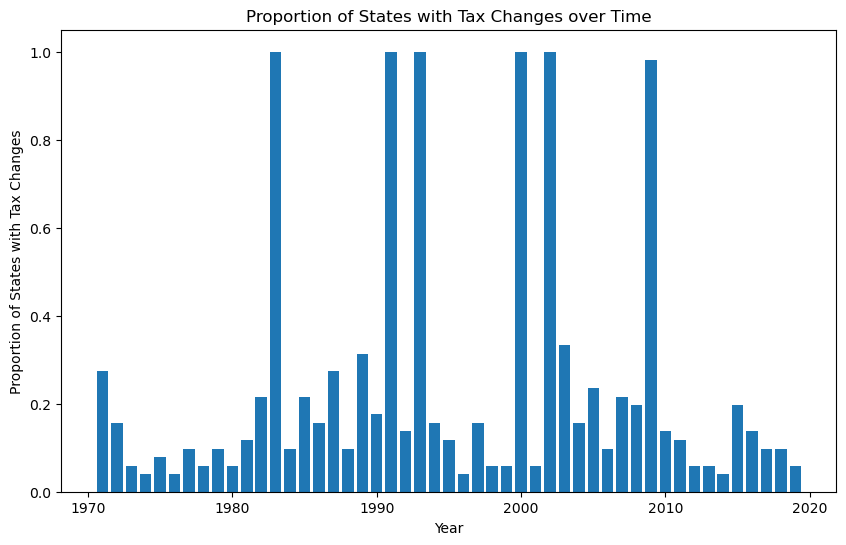

In [2]:
plt.figure(figsize=(10, 6))
data_tax_change = data[data['tax_change'] != 0]
data_tax_change=data_tax_change.groupby('Year').agg({'tax_change':'count'}).reset_index()
data_tax_change['tax_change'] = data_tax_change['tax_change']/data['state'].nunique()
plt.bar(data_tax_change['Year'], data_tax_change['tax_change'])
plt.xlabel('Year')
plt.ylabel('Proportion of States with Tax Changes')
plt.title('Proportion of States with Tax Changes over Time')
q1_fig = plt.gcf()
plt.show()


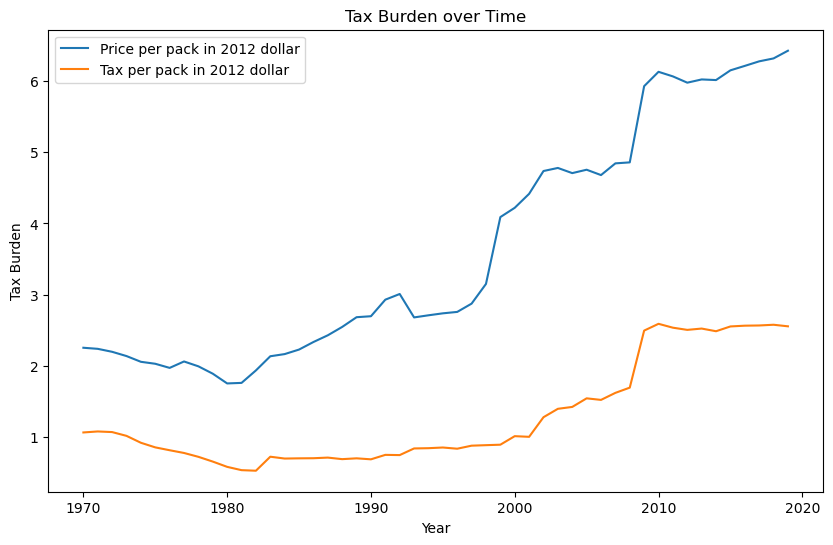

In [ ]:
# plot the average price_cpi
plt.figure(figsize=(10, 6))
avg_price = data.groupby('Year').agg({'price_cpi':'mean','tax_cpi':'mean'}).reset_index()
plt.plot(avg_price['Year'], avg_price['price_cpi'])
plt.plot(avg_price['Year'], avg_price['tax_cpi'])
plt.xlabel('Year')
plt.ylabel('Tax Burden')
plt.title('Tax Burden over Time')
plt.legend(['Price per pack in 2012 dollar','Tax per pack in 2012 dollar'])
q2_fig = plt.gcf()
plt.show()


In [3]:
# Identify the 5 states with the highest increases in cigarette prices (in dollars) over the time period.
data['price_change'] = np.nan
for i in range(len(data)):
    if data['Year'][i] == 1970:
        data['price_change'][i] = 0
    else:
        data['price_change'][i] = data['price_cpi'][i] - data['price_cpi'][i-1]

data_price_change = data[data['price_change'] != 0]
data_price_change=data_price_change.groupby('state').agg({'price_change':'sum'}).reset_index()
data_price_change = data_price_change.sort_values(by='price_change', ascending=False)
# add two columns that shows the price of each state in 1970 and 2019
data_price_change['price_1970'] = np.nan
data_price_change['price_2019'] = np.nan
for i in range(len(data_price_change)):
    data_price_change['price_1970'][i] = data[(data['Year'] == 1970) & (data['state'] == data_price_change['state'][i])]['price_cpi'].values[0]
    data_price_change['price_2019'][i] = data[(data['Year'] == 2019) & (data['state'] == data_price_change['state'][i])]['price_cpi'].values[0]
q3_table = data_price_change.head(5)
data_price_change.head(5)


,state,price_change,price_1970,price_2019
8,District of Columbia,7.441234,1.931230,9.372464
32,New York,7.005608,2.470316,9.475923
39,Rhode Island,6.500704,2.381455,8.882160
21,Massachusetts,6.346255,2.428847,8.775102
6,Connecticut,6.339671,2.695428,9.035099


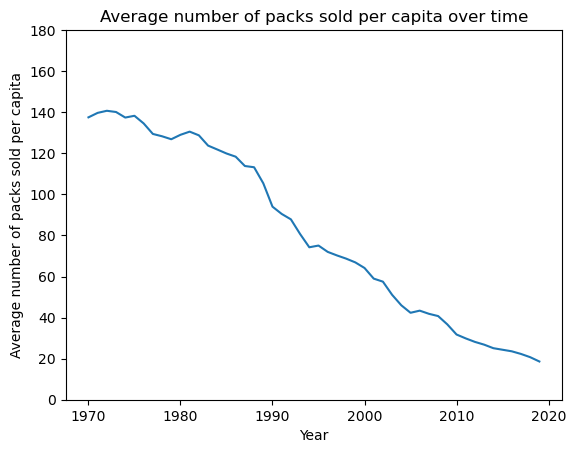

In [ ]:
#Plot the average number of packs sold per capita for those states from 1970 to 2018.
top5_per_capita = data[(data['state']=='District of Columbia') | (data['state']=='New York') | (data['state']=='Connecticut') | (data['state']=='Rhode Island') | (data['state']=='Massachusetts')]

plt.figure(figsize=(10, 6))
avg_per_capita = top5_per_capita.groupby('Year').agg({'sales_per_capita':'mean'}).reset_index()
plt.plot(avg_per_capita['Year'], avg_per_capita['sales_per_capita'])
plt.xlabel('Year')
plt.ylim(0, 180)
plt.ylabel('Average number of packs sold per capita')
plt.title('Average number of packs sold per capita over time')
q3_fig = plt.gcf()
plt.show()



In [4]:
# lowest 5
data_price_change_descend = data_price_change.sort_values(by='price_change', ascending=True)
data_price_change_descend.head(5)

,state,price_change,price_1970,price_2019
25,Missouri,2.505294,2.180039,4.685332
42,Tennessee,2.524120,2.464392,4.988512
34,North Dakota,2.579710,2.304443,4.884153
0,Alabama,2.673970,2.529556,5.203526
10,Georgia,2.695882,2.120798,4.816680


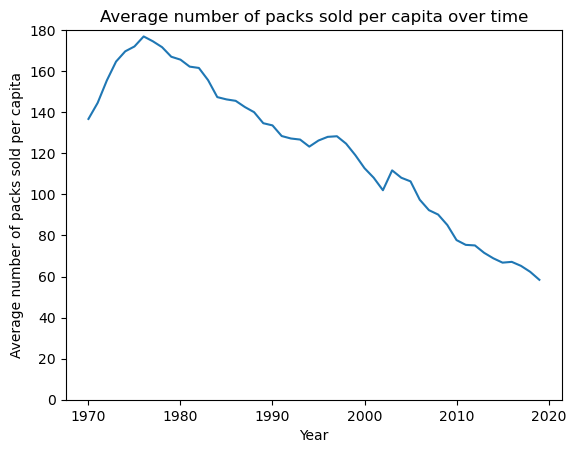

In [5]:
# Plot the average number of packs sold per capita for those states from 1970 to 2018.
lowest5_per_capita = data[(data['state']=='Missouri') | (data['state']=='Kentucky') | (data['state']=='Virginia') | (data['state']=='North Carolina') | (data['state']=='Georgia')]
avg_per_capita_lowest = lowest5_per_capita.groupby('Year').agg({'sales_per_capita':'mean'}).reset_index()
plt.plot(avg_per_capita_lowest['Year'], avg_per_capita_lowest['sales_per_capita'])
plt.xlabel('Year')
plt.ylim(0, 180)
plt.ylabel('Average number of packs sold per capita')
plt.title('Average number of packs sold per capita over time')
plt.show()


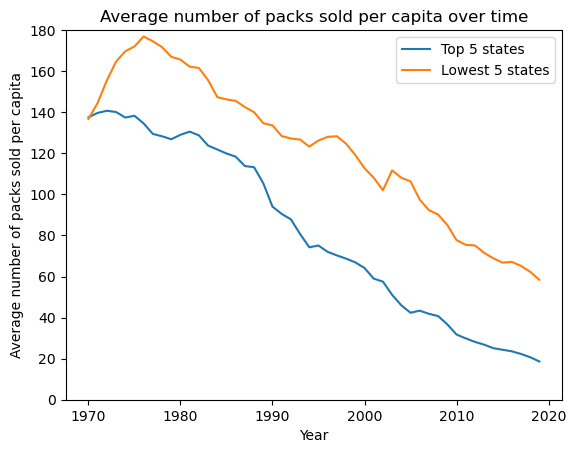

In [ ]:
# plot above two graphs together
plt.plot(avg_per_capita['Year'], avg_per_capita['sales_per_capita'])
plt.plot(avg_per_capita_lowest['Year'], avg_per_capita_lowest['sales_per_capita'])
plt.xlabel('Year')
plt.ylim(0, 180)
plt.ylabel('Average number of packs sold per capita')
plt.title('Average number of packs sold per capita over time')
plt.legend(['Top 5 states','Lowest 5 states'])
plt.show()


In [6]:
# focusing on 1970 to 1990, regress log sales on log prices 
import statsmodels.api as sm
data_1970_1990 = data[(data['Year'] >= 1970) & (data['Year'] <= 1990)]
data_1970_1990['log_sales'] = np.log(data_1970_1990['sales_per_capita'])
data_1970_1990['log_price'] = np.log(data_1970_1990['price_cpi'])
data_1970_1990['log_tax'] = np.log(data_1970_1990['tax_cpi'])
data_1970_1990 = data_1970_1990.dropna()

year_dummies = pd.get_dummies(data_1970_1990['Year'], drop_first=True)
data_1970_1990 = pd.concat([data_1970_1990, year_dummies], axis=1)
state_dummies = pd.get_dummies(data_1970_1990['state'], drop_first=True)
# add ones to the state dummies
state_dummies = sm.add_constant(state_dummies)
data_1970_1990 = pd.concat([data_1970_1990, state_dummies], axis=1)


import statsmodels.api as sm
X = pd.concat([data_1970_1990['log_price'], state_dummies, year_dummies], axis=1)
y = data_1970_1990['log_sales']
X = sm.add_constant(X)
model_ols = sm.OLS(y, X).fit()


In [7]:
formula = 'log_sales ~ 1 + C(Year) + C(state) + [log_price ~ log_tax]'
from linearmodels.iv import IV2SLS
# Fit the IV regression model
iv_model = IV2SLS.from_formula(formula, data_1970_1990)
iv_results = iv_model.fit()

<Figure size 1000x600 with 1 Axes>

In [ ]:
# use two stage least squares to estimate the price elasticity of demand for cigarettes
from linearmodels.iv import IV2SLS


exog = sm.add_constant(pd.concat([state_dummies, year_dummies], axis=1))

data_1970_1990 = data_1970_1990.dropna()

# None for exog if no exogenous variables
iv = IV2SLS(dependent=data_1970_1990['log_sales'], exog=exog, endog=data_1970_1990['log_price'], instruments=data_1970_1990['log_tax']).fit()


In [8]:
# first form
X = pd.concat([data_1970_1990['log_tax'],state_dummies, year_dummies], axis=1)
y = data_1970_1990['log_price']
X = sm.add_constant(X)
model_first = sm.OLS(y, X).fit()

# reduced form
X = pd.concat([data_1970_1990['log_tax'], state_dummies, year_dummies], axis=1)
y = data_1970_1990['log_sales']
X = sm.add_constant(X)
model_reduced = sm.OLS(y, X).fit()


<Figure size 1000x600 with 1 Axes>

In [ ]:
iv.params['log_price'],iv.std_errors['log_price']

In [50]:
# put all the results together using a table
from statsmodels.iolib.summary2 import summary_col

info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=[model_ols,model_ols, model_first, model_reduced],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['OLS', 'IV', 'First Form', 'Reduced Form'],
                            info_dict=info_dict,
                            # include only 'log_price', 'log_tax', 'const'
                            regressor_order= ['const','log_price', 'log_tax','Georgia'],
                            drop_omitted=True)
results_table.add_title('Table 1 - OLS, Reduced Form, and First Form Results')
print(results_table)

f = open('regression1970.tex', 'w')
f.write(results_table.as_latex())
f.close()

   Table 1 - OLS, Reduced Form, and First Form Results
                   OLS       IV    First Form Reduced Form
----------------------------------------------------------
const            5.29***  5.29***  0.81***    4.70***     
                 (0.04)   (0.04)   (0.01)     (0.02)      
log_price        -0.74*** -0.74***                        
                 (0.04)   (0.04)                          
log_tax                            0.36***    -0.34***    
                                   (0.01)     (0.02)      
Georgia          0.08***  0.08***  -0.01      0.08***     
                 (0.02)   (0.02)   (0.01)     (0.02)      
R-squared        0.92     0.92     0.96       0.92        
R-squared Adj.   0.92     0.92     0.96       0.92        
R-squared        0.92     0.92     0.96       0.92        
No. observations 1071     1071     1071       1071        
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


c:\Users\huang\anaconda3\Lib\site-packages\statsmodels\iolib\summary2.py:524: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  return x.merge(y, how='outer', right_index=True, left_index=True)
c:\Users\huang\anaconda3\Lib\site-packages\statsmodels\iolib\summary2.py:524: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  return x.merge(y, how='outer', right_index=True, left_index=True)


In [ ]:
# repeat for 1991 to 2015
data_1991_2015 = data[(data['Year'] >= 1991) & (data['Year'] <= 2015)]
data_1991_2015['log_sales'] = np.log(data_1991_2015['sales_per_capita'])
data_1991_2015['log_price'] = np.log(data_1991_2015['price_cpi'])
data_1991_2015['log_tax'] = np.log(data_1991_2015['tax_cpi'])
data_1991_2015 = data_1991_2015.dropna()

year_dummies = pd.get_dummies(data_1991_2015['Year'], drop_first=True)
data_1991_2015 = pd.concat([data_1991_2015, year_dummies], axis=1)
state_dummies = pd.get_dummies(data_1991_2015['state'], drop_first=True)
# add ones to the state dummies
state_dummies = sm.add_constant(state_dummies)
data_1991_2015 = pd.concat([data_1991_2015, state_dummies], axis=1)

import statsmodels.api as sm
X = pd.concat([data_1991_2015['log_price'], state_dummies, year_dummies], axis=1)
y = data_1991_2015['log_sales']
model_ols = sm.OLS(y, X).fit()

formula = 'log_sales ~ 1 + C(Year) + C(state) + [log_price ~ log_tax]'
iv_model = IV2SLS.from_formula(formula, data_1991_2015)
iv_results = iv_model.fit()

year_dummies = pd.get_dummies(data_1991_2015['Year'], drop_first=True)
data_1991_2015 = pd.concat([data_1991_2015, year_dummies], axis=1)
state_dummies = pd.get_dummies(data_1991_2015['state'], drop_first=True)
# add ones to the state dummies
state_dummies = sm.add_constant(state_dummies)
data_1991_2015 = pd.concat([data_1991_2015, state_dummies], axis=1)

exog = pd.concat([state_dummies, year_dummies], axis=1)

data_1991_2015 = data_1991_2015.dropna()

# None for exog if no exogenous variables
iv = IV2SLS(dependent=data_1991_2015['log_sales'], exog=exog, endog=data_1991_2015['log_price'], instruments=data_1991_2015['log_tax']).fit()

# first form
X = pd.concat([data_1991_2015['log_tax'],state_dummies, year_dummies], axis=1)
y = data_1991_2015['log_price']
X = sm.add_constant(X)
model_first = sm.OLS(y, X).fit()

# reduced form
X = pd.concat([data_1991_2015['log_tax'], state_dummies, year_dummies], axis=1)
y = data_1991_2015['log_sales']
X = sm.add_constant(X)
model_reduced = sm.OLS(y, X).fit()



In [ ]:
iv.params['const'],iv.std_errors['const']

(5.634805045013536, 0.057633961862214395)

In [ ]:
iv.params['log_price'],iv.std_errors['log_price']

(-0.8715346991680235, 0.05447880169472025)

In [ ]:
# r-squared and adjusted r-squared
iv.rsquared, iv.rsquared_adj

(0.9369562784537915, 0.9330127595914348)

In [ ]:
# put all the results together using a table
from statsmodels.iolib.summary2 import summary_col

info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=[model_ols,model_ols, model_first, model_reduced],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['OLS', 'IV', 'First Form', 'Reduced Form'],
                            info_dict=info_dict,
                            # include only 'log_price', 'log_tax', 'const'
                            regressor_order= ['const','log_price', 'log_tax','Georgia'],
                            drop_omitted=True)
results_table.add_title('Table 1 - OLS, Reduced Form, and First Form Results')
print(results_table)

f = open('regression1991.tex', 'w')
f.write(results_table.as_latex())
f.close()

   Table 1 - OLS, Reduced Form, and First Form Results
                   OLS       IV    First Form Reduced Form
----------------------------------------------------------
const            5.66***  5.66***  1.18***    4.61***     
                 (0.04)   (0.04)   (0.01)     (0.03)      
log_price        -1.00*** -1.00***                        
                 (0.02)   (0.02)                          
log_tax                            0.33***    -0.29***    
                                   (0.01)     (0.02)      
Georgia                            -0.02      -0.14***    
                                   (0.01)     (0.03)      
R-squared        0.56     0.56     0.98       0.93        
R-squared Adj.   0.56     0.56     0.98       0.93        
R-squared        0.56     0.56     0.98       0.93        
No. observations 1275     1275     1275       1275        
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


c:\Users\huang\anaconda3\Lib\site-packages\statsmodels\iolib\summary2.py:524: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  return x.merge(y, how='outer', right_index=True, left_index=True)
c:\Users\huang\anaconda3\Lib\site-packages\statsmodels\iolib\summary2.py:524: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  return x.merge(y, how='outer', right_index=True, left_index=True)
